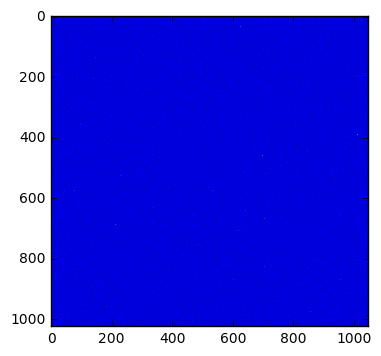

In [43]:
import numpy as np
import astropy.io.fits as pf
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from PIL import Image
import pdb
import math

#'sun/solar_scan-021_12.fit'
sun22 = pf.getdata("Nov-17-2017/solar_scan-022-2.fit")
sun30 = pf.getdata("Nov-17-2017/solar_scan-030-2.fit")
sun31 = pf.getdata("Nov-17-2017/solar_scan-031-2.fit")
sun32 = pf.getdata("Nov-17-2017/solar_scan-032-2.fit")
sun33 = pf.getdata("Nov-17-2017/solar_scan-033-2.fit")
sun34 = pf.getdata("Nov-17-2017/solar_scan-034-2.fit")
sun35 = pf.getdata("Nov-17-2017/solar_scan-035-2.fit")
sun36 = pf.getdata("Nov-17-2017/solar_scan-036-2.fit")
sun37 = pf.getdata("Nov-17-2017/solar_scan-037-2.fit")
sun38 = pf.getdata("Nov-17-2017/solar_scan-038-2.fit")
sun39 = pf.getdata("Nov-17-2017/solar_scan-039-2.fit")
sun40 = pf.getdata("Nov-17-2017/solar_scan-040-2.fit")
sun41 = pf.getdata("Nov-17-2017/solar_scan-041-2.fit")
sun42 = pf.getdata("Nov-17-2017/solar_scan-042-2.fit")
sun43 = pf.getdata("Nov-17-2017/solar_scan-043-2.fit")
sun44 = pf.getdata("Nov-17-2017/solar_scan-044-2.fit")
sun45 = pf.getdata("Nov-17-2017/solar_scan-045-2.fit")
sun46 = pf.getdata("Nov-17-2017/solar_scan-046-2.fit")
sun47 = pf.getdata("Nov-17-2017/solar_scan-047-2.fit")
sun48 = pf.getdata("Nov-17-2017/solar_scan-048-2.fit")
sun49 = pf.getdata("Nov-17-2017/solar_scan-049-2.fit")
sun50 = pf.getdata("Nov-17-2017/solar_scan-050-2.fit")
sun51 = pf.getdata("Nov-17-2017/solar_scan-051-2.fit")
sun52 = pf.getdata("Nov-17-2017/solar_scan-052-2.fit")
sun53 = pf.getdata("Nov-17-2017/solar_scan-053-2.fit")
sun54 = pf.getdata("Nov-17-2017/solar_scan-054-2.fit")
sun55 = pf.getdata("Nov-17-2017/solar_scan-055-2.fit")
sun56 = pf.getdata("Nov-17-2017/solar_scan-056-2.fit")
sun57 = pf.getdata("Nov-17-2017/solar_scan-057-2.fit")
sun58 = pf.getdata("Nov-17-2017/solar_scan-058-2.fit")
dark_file = 'Scans/Dark.fit'
dark_data = pf.getdata(dark_file)

plt.figure()
plt.imshow(dark_data)
plt.show()

#########################################################################

def peak_finder(signal_array):
    threshold = 300
    peaks = []                            #x positions of the peaks, or rather, their index
    for i in range(2,len(signal_array)-2): 
        if signal_array[i] > signal_array[i+2]  and signal_array[i] > signal_array[i+1] and signal_array[i] > signal_array[i-1] and signal_array[i] > signal_array[i-2]:  #four conditions to be a peak (see description)
            if signal_array[i] > threshold:                      #is the value of the spectrum at i higher than our threshold?
                peaks.append(i)
    return peaks
    
#print('peaks at:',peak_finder(data1y))
#print('peak intensities are:', peak_finder(data1y))

def centroid(x_range,y_range):
    '''A function to return the centroid given equally sized x and y ranges over which to perform the calculation'''
    x_range = np.array(x_range) #make sure these are arrays if they aren't already
    y_range = np.array(y_range) #make sure these are arrays if they aren't already
    ... #convert the math formula for a centroid into code in these lines
    x_centroid = sum(x_range*y_range)/(sum(y_range))
    return x_centroid

def find_all_centroids(x_range,y_range):
	peaks = peak_finder(y_range) #define the peak positions in x indicies
	multicen = [] #empty array to append
	for i in peaks: #for loops for indicies in peaks
		y = y_range[i] #define the y which uses the y-axis indicies
		halfmax = y/2 #half of each peaks
		#print(halfmax)
		#multicen.append(centroid(x_range[i-4:i+4],y_range[i-4:i+4]))
		#The following codes are for more general way:
		dr = np.where(y_range[i:] < halfmax)[0][0] # everything to the right after half of each peaks
		dl = np.where(y_range[:i] < halfmax)[0][-1] # everything to the left
		multicen.append(centroid(x_range[dl:i+dr], y_range[dl:i+dr])) #append centroid back
	return multicen #returns multicen = [] with each newl updated centroid


SIMPLE:  True
BITPIX:  16
NAXIS:  2
NAXIS1:  1048
NAXIS2:  1024
BSCALE:  1.0
BZERO:  32768.0
DATE-OBS:  2017-11-17T01:25:53
EXPTIME:  5.0
EXPOSURE:  5.0
CCD-TEMP:  4.696015500000001
XPIXSZ:  13.0
YPIXSZ:  13.0
XBINNING:  1
YBINNING:  1
XORGSUBF:  0
YORGSUBF:  0
READOUTM:  Monochrome
IMAGETYP:  Light Frame
JD:  2458074.559641204
FOCALLEN:  0.0
APTDIA:  0.0
APTAREA:  0.0
SWCREATE:  MaxIm DL Version 5.24 140424 2R52E
:   the image
SBSTDVER:  SBFITSEXT Version 1.0
HISTORY:   Dark subtraction (Simple Auto-dark)
CALSTAT:  D
PEDESTAL:  -100
OBJECT:  
TELESCOP:  
INSTRUME:  Apogee USB/Net
OBSERVER:  
NOTES:  
FLIPSTAT:  
ANMISCH:  1 arc sec
ANMISLE:  400
ANMISLG:  1
ANM00000:  "<Measurements version=%221%22></Measurements>"
CBLACK:  2167
CWHITE:  8264
SWOWNER:  Attila Kabai


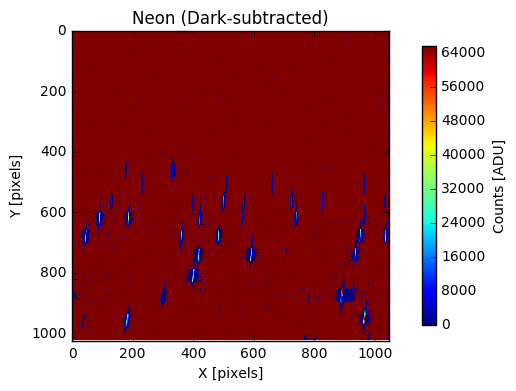

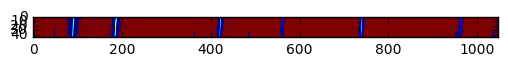

neon_data = [[ 41   0  12 ...,  86  88 105]
 [  4  27  33 ...,  97 120  87]
 [ 19  16  24 ..., 103  78 103]
 ..., 
 [ 32  46   0 ..., 100  87  80]
 [ 15  62  29 ...,  95  94  98]
 [ 35  33   9 ..., 100  85  98]]
Length of neon_data from 600 to 647 row = 47
sum of rows array =  [1580 2269 2170 ..., 4604 4453 4433]
average of those 47 rows =  [ 33.61702128  48.27659574  46.17021277 ...,  97.95744681  94.74468085
  94.31914894]
1048


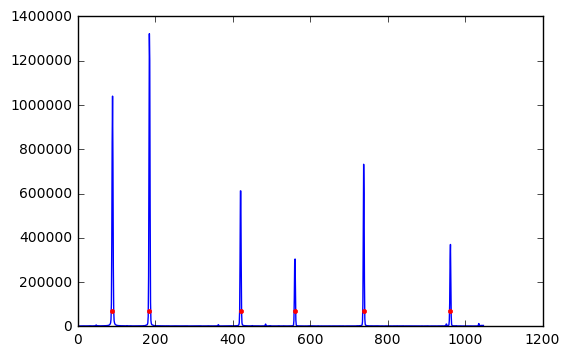

[89.717017538171831, 184.98830383064177, 420.20240225761904, 560.25100383950291, 737.99700144532301, 961.69102385030158]


In [52]:
neon_file = 'Scans/Neon.fit'
neon_header = pf.getheader(neon_file) #Get the header from the fits file
neon_data = pf.getdata(neon_file) #Get the CCD data from the fits file


for key in neon_header:
    print(key + ": ", neon_header[key])

plt.figure()

ds_neon = plt.imshow(neon_data - dark_data)

clb = plt.colorbar(ds_neon, fraction=0.03, pad=0.07)
clb.ax.set_ylabel('Counts [ADU]')

plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.title('Neon (Dark-subtracted)')
#600:647
plt.show()
sliced_neon = plt.imshow(neon_data[600:647,:] - dark_data[600:647,:])
plt.show()

print('neon_data =', neon_data)
print('Length of neon_data from 600 to 647 row =', len(neon_data[600:647,0]))

########################################################################
sum_array = np.sum(neon_data[600:647,:], axis = 0)
mean_sum = sum_array/47

print('sum of rows array = ', sum_array)
print('average of those 47 rows = ', mean_sum)
print(len(mean_sum))

plt.plot(sum_array)
#plt.show()
centroids_neon = find_all_centroids(np.arange(0,len(mean_sum)),mean_sum)
plt.plot(centroids_neon,np.zeros(len(centroids_neon))+70000, 'r.')
plt.show()
print(centroids_neon)

[89.717017538171831, 184.98830383064177, 420.20240225761904, 560.25100383950291, 737.99700144532301, 961.69102385030158]


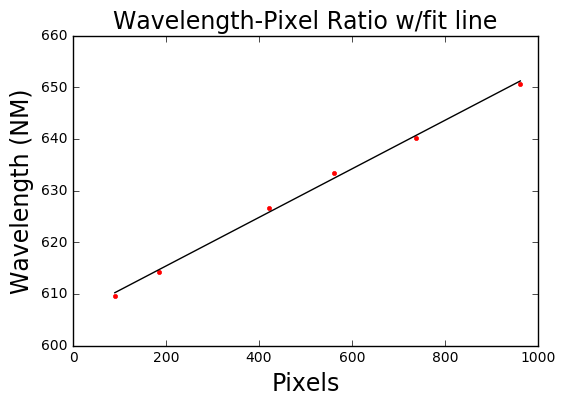

Covarience for neon: [[  2.79489240e-06  -1.37641312e-03]
 [ -1.37641312e-03   9.32660373e-01]]
Variance of Slope for neon:  2.7948923973e-06
Standard Deviation of Slope for neon: 0.00167179316822
Variance of y-intercept for neon: 0.932660372922
Standard Deviation of y-intercept for neon: 0.965743430173
slope for neon: 0.0469991071522
Y-intercept:  606.004640141
Coeff for neon: [  4.69991072e-02   6.06004640e+02]
[ 609.616  614.316  626.649  633.443  640.225  650.654]


In [54]:
print(centroids_neon)

wl_neon = np.array([609.616, 614.316, 626.649, 633.443, 640.225,650.654])
#wl_neon = np.array([638.299, 640.225, 650.653, 653.288, 659.895, 667.288])
nfit, ncov = np.polyfit(centroids_neon, wl_neon, 1, full=False, cov = True)
pn = np.poly1d(nfit)
nys = pn(centroids_neon)


plt.plot(centroids_neon, wl_neon, 'r.')
plt.plot(centroids_neon, nys, 'k-')
plt.title('Wavelength-Pixel Ratio w/fit line', fontsize = 17)
plt.xlabel('Pixels', fontsize = 17)
plt.ylabel('Wavelength (NM)', fontsize = 17)
plt.show()
print('Covarience for neon:', ncov)
print('Variance of Slope for neon: ', ncov[0][0])
print('Standard Deviation of Slope for neon:', np.sqrt(ncov[0][0]))

print('Variance of y-intercept for neon:', ncov[1][1])
print('Standard Deviation of y-intercept for neon:', np.sqrt(ncov[1][1]))
print('slope for neon:', pn[1])
print('Y-intercept: ', pn[0])
print('Coeff for neon:', nfit)

print(wl_neon)

SIMPLE:  True
BITPIX:  16
NAXIS:  2
NAXIS1:  1048
NAXIS2:  1024
BSCALE:  1.0
BZERO:  32768.0
DATE-OBS:  2017-11-17T20:34:05
EXPTIME:  0.8
EXPOSURE:  0.8
SET-TEMP:  5.0
CCD-TEMP:  4.975764750000001
XPIXSZ:  13.0
YPIXSZ:  13.0
XBINNING:  1
YBINNING:  1
XORGSUBF:  0
YORGSUBF:  0
READOUTM:  Monochrome
IMAGETYP:  Light Frame
JD:  2458075.3570023146
FOCALLEN:  0.0
APTDIA:  0.0
APTAREA:  0.0
SWCREATE:  MaxIm DL Version 5.24 140424 2R52E
:   the image
SBSTDVER:  SBFITSEXT Version 1.0
HISTORY:   Dark subtraction (Simple Auto-dark)
CALSTAT:  D
PEDESTAL:  -100
OBJECT:  solar_scan
TELESCOP:  
INSTRUME:  Apogee USB/Net
OBSERVER:  
NOTES:  
FLIPSTAT:  
SWOWNER:  Attila Kabai
SIMPLE:  True
BITPIX:  16
NAXIS:  2
NAXIS1:  1048
NAXIS2:  1024
BSCALE:  1.0
BZERO:  32768.0
DATE-OBS:  2017-11-17T20:34:59
EXPTIME:  0.8
EXPOSURE:  0.8
SET-TEMP:  5.0
CCD-TEMP:  4.928616
XPIXSZ:  13.0
YPIXSZ:  13.0
XBINNING:  1
YBINNING:  1
XORGSUBF:  0
YORGSUBF:  0
READOUTM:  Monochrome
IMAGETYP:  Light Frame
JD:  2458075.3576

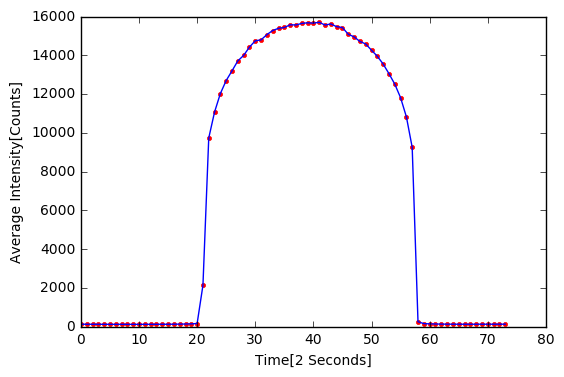

number 21  =  152.45080846
number 22  =  2123.24991148
number 23  =  9729.43721579
number 24  =  11070.549431
number 25  =  12024.7538326
number 26  =  12695.8867374
number 27  =  13194.0054447
number 28  =  13706.9094052
number 29  =  13991.507943
number 30  =  14419.5590075
number 31  =  14746.1494355
number 32  =  14794.2535447
number 33  =  15065.0050943
number 34  =  15275.5833573
number 35  =  15389.7498211
number 36  =  15432.366169
number 37  =  15570.4122603
number 38  =  15563.2271076
number 39  =  15641.8761695
number 40  =  15674.2411401
number 41  =  15657.8157978
number 42  =  15700.3060349
number 43  =  15559.5828196
number 44  =  15614.6281151
number 45  =  15475.7064619
number 46  =  15430.0528853
number 47  =  15083.2343769
number 48  =  14951.8291472
number 49  =  14712.7004292
number 50  =  14583.2788626
number 51  =  14260.2507977
number 52  =  13947.9982295
number 53  =  13551.0023846
number 54  =  13051.4563827
number 55  =  12512.701622
number 56  =  11811.51199

In [46]:

sun_data1 = pf.getdata('Nov-17-2017/solar_scan-021-2.fit')
sum_sun1 = np.sum(sun_data1)
header = pf.getheader('Nov-17-2017/solar_scan-059-2.fit')
for key in header:
    print(key + ": ", header[key])
    
    
header2 = pf.getheader('Nov-17-2017/solar_scan-074-2.fit')
for key in header2:
    print(key + ": ", header2[key])
    
    
    
print(sun_data1)
print(sum_sun1)
#names = np.arange(1,70)
#strnames = str(names)

sun_intense1 = [] #sun scans from 1-9
for i in np.arange(1, 10):
    sun_datas = pf.getdata("Nov-17-2017/solar_scan-00" + str(i) + "-2.fit")
    sum_data = np.sum(np.mean(sun_datas))
    sun_intense1.append(sum_data)

sun_intense2 = [] #sun scans from 10 - 75
for i in np.arange(10, 75):
    sun_datas2 = pf.getdata("Nov-17-2017/solar_scan-0" + str(i) + "-2.fit")
    sum_data2 = np.sum(np.mean(sun_datas2))
    sun_intense2.append(sum_data2)
    
total_sun = sun_intense1 + sun_intense2
#print('total = ', total_sun)
plt.plot(total_sun, 'r.')
plt.xlabel('Time[2 Seconds]')
plt.ylabel('Average Intensity[Counts]')

sunfit = np.poly1d(total_sun)
plt.plot(sunfit)
plt.show()

for i in np.arange(21, 60):
    sun_datas2 = pf.getdata("Nov-17-2017/solar_scan-0" + str(i) + "-2.fit")
    sum_data2 = np.sum(np.mean(sun_datas2))
    print('number', i , ' = ', sum_data2)
    

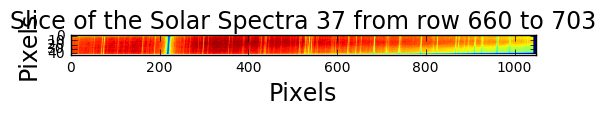

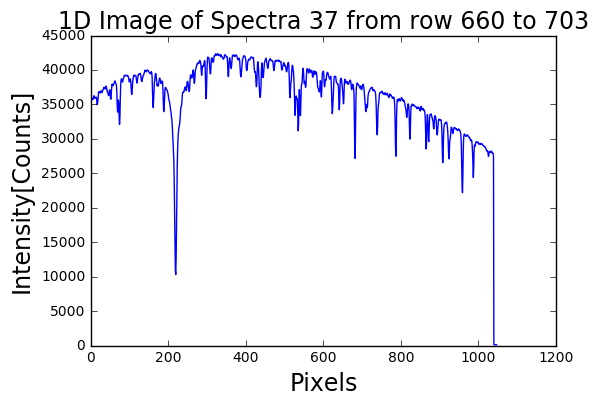

In [58]:
plt.imshow(sun37[660:703,:])
plt.ylabel('Pixels', fontsize =17)
plt.xlabel('Pixels', fontsize =17)
plt.title('Slice of the Solar Spectra 37 from row 660 to 703', fontsize =17)
plt.show()

plt.plot(sun37_array)
plt.ylabel('Intensity[Counts]', fontsize =17)
plt.xlabel('Pixels', fontsize =17)
plt.title('1D Image of Spectra 37 from row 660 to 703', fontsize =17)
plt.show()

[ 109.56230123  109.55440719  109.55943168  109.55551557  109.54991646
  109.55249926  109.55185892  109.55508303  109.55412024  109.55954082
  109.55580536  109.56187039  109.56477345  109.55616502  109.56563251
  109.5571792   109.55756449  109.56742238]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


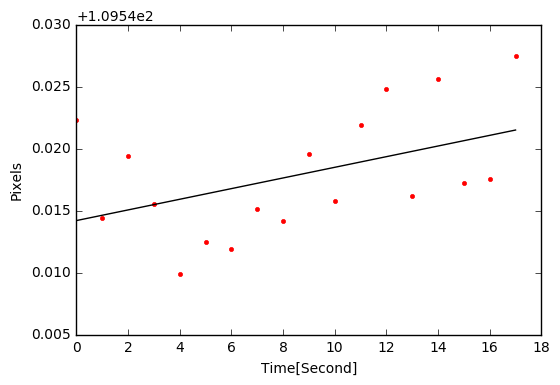

slope: 0.000429540321255
Y-intercept:  109.554187085


In [51]:
sun40_array = np.sum(sun40[660:703,:], axis = 0)/43
sun41_array = np.sum(sun41[660:703,:], axis = 0)/43
sun42_array = np.sum(sun42[660:703,:], axis = 0)/43
sun43_array = np.sum(sun43[660:703,:], axis = 0)/43
sun44_array = np.sum(sun44[660:703,:], axis = 0)/43
sun45_array = np.sum(sun45[660:703,:], axis = 0)/43
sun46_array = np.sum(sun46[660:703,:], axis = 0)/43
sun47_array = np.sum(sun47[660:703,:], axis = 0)/43
sun48_array = np.sum(sun48[660:703,:], axis = 0)/43
sun49_array = np.sum(sun49[660:703,:], axis = 0)/43
sun50_array = np.sum(sun50[660:703,:], axis = 0)/43
sun51_array = np.sum(sun51[660:703,:], axis = 0)/43
sun52_array = np.sum(sun52[660:703,:], axis = 0)/43
sun53_array = np.sum(sun53[660:703,:], axis = 0)/43
sun54_array = np.sum(sun54[660:703,:], axis = 0)/43
sun55_array = np.sum(sun55[660:703,:], axis = 0)/43
sun56_array = np.sum(sun56[660:703,:], axis = 0)/43
sun57_array = np.sum(sun57[660:703,:], axis = 0)/43
sun58_array = np.sum(sun57[660:703,:], axis = 0)/43
zeros1 = np.zeros(100)
zeros2 = np.zeros(100)

sliced_sum40 = np.sum(sun40_array/len(sun40_array))
sliced_sum41 = np.sum(sun41_array/len(sun41_array))
sliced_sum42 = np.sum(sun42_array/len(sun42_array))
sliced_sum43 = np.sum(sun43_array/len(sun43_array))
sliced_sum44 = np.sum(sun44_array/len(sun44_array))
sliced_sum45 = np.sum(sun45_array/len(sun45_array))
sliced_sum46 = np.sum(sun46_array/len(sun46_array))
sliced_sum47 = np.sum(sun47_array/len(sun47_array))
sliced_sum48 = np.sum(sun48_array/len(sun48_array))
sliced_sum49 = np.sum(sun49_array/len(sun49_array))
sliced_sum50 = np.sum(sun50_array/len(sun50_array))
sliced_sum51 = np.sum(sun51_array/len(sun51_array))
sliced_sum52 = np.sum(sun52_array/len(sun52_array))
sliced_sum53 = np.sum(sun53_array/len(sun53_array))
sliced_sum54 = np.sum(sun54_array/len(sun54_array))
sliced_sum55 = np.sum(sun55_array/len(sun55_array))
sliced_sum56 = np.sum(sun56_array/len(sun56_array))
sliced_sum57 = np.sum(sun57_array/len(sun57_array))
sliced_sum58 = np.sum(sun58_array/len(sun58_array))

sub_sliced40 = sun40_array - sliced_sum40
sub_sliced41 = sun41_array - sliced_sum41
sub_sliced42 = sun42_array - sliced_sum42
sub_sliced43 = sun43_array - sliced_sum43
sub_sliced44 = sun44_array - sliced_sum44
sub_sliced45 = sun45_array - sliced_sum45
sub_sliced46 = sun46_array - sliced_sum46
sub_sliced47 = sun47_array - sliced_sum47
sub_sliced48 = sun48_array - sliced_sum48
sub_sliced49 = sun49_array - sliced_sum49
sub_sliced50 = sun50_array - sliced_sum50
sub_sliced51 = sun51_array - sliced_sum51
sub_sliced52 = sun52_array - sliced_sum52
sub_sliced53 = sun53_array - sliced_sum53
sub_sliced54 = sun54_array - sliced_sum54
sub_sliced55 = sun55_array - sliced_sum55
sub_sliced56 = sun56_array - sliced_sum56
sub_sliced57 = sun57_array - sliced_sum57
sub_sliced58 = sun58_array - sliced_sum58



sun37_array = np.sum(sun37[660:703,:], axis = 0)/43

sliced_sum37= np.sum(sun37_array/ len(sun37_array))

sub_sliced37 = sun37_array - sliced_sum37

#############################################################
##############################################################
zero_sun110 = np.append(zeros1, sub_sliced37)
zero_sun111 = np.append(zeros1, sub_sliced40)
zero_sun112 = np.append(zeros1, sub_sliced41)
zero_sun113 = np.append(zeros1, sub_sliced42)
zero_sun114 = np.append(zeros1, sub_sliced43)
zero_sun115 = np.append(zeros1, sub_sliced44)
zero_sun116 = np.append(zeros1, sub_sliced45)
zero_sun117 = np.append(zeros1, sub_sliced46)
zero_sun118 = np.append(zeros1, sub_sliced47)
zero_sun119 = np.append(zeros1, sub_sliced48)
zero_sun120 = np.append(zeros1, sub_sliced49)
zero_sun121 = np.append(zeros1, sub_sliced50)
zero_sun122 = np.append(zeros1, sub_sliced51)
zero_sun123 = np.append(zeros1, sub_sliced52)
zero_sun124 = np.append(zeros1, sub_sliced53)
zero_sun125 = np.append(zeros1, sub_sliced54)
zero_sun126 = np.append(zeros1, sub_sliced55)
zero_sun127 = np.append(zeros1, sub_sliced56)
zero_sun128 = np.append(zeros1, sub_sliced57)
zero_sun129 = np.append(zeros1, sub_sliced58)

zero_sun37 = np.append(zero_sun110, zeros2)
zero_sun40 = np.append(zero_sun111, zeros2)
zero_sun41 = np.append(zero_sun112, zeros2)
zero_sun42 = np.append(zero_sun113, zeros2)
zero_sun43 = np.append(zero_sun114, zeros2)
zero_sun44 = np.append(zero_sun115, zeros2)
zero_sun45 = np.append(zero_sun116, zeros2)
zero_sun46 = np.append(zero_sun117, zeros2)
zero_sun47 = np.append(zero_sun118, zeros2)
zero_sun48 = np.append(zero_sun119, zeros2)
zero_sun49 = np.append(zero_sun120, zeros2)
zero_sun50 = np.append(zero_sun121, zeros2)
zero_sun51 = np.append(zero_sun122, zeros2)
zero_sun52 = np.append(zero_sun123, zeros2)
zero_sun53 = np.append(zero_sun124, zeros2)
zero_sun54 = np.append(zero_sun125, zeros2)
zero_sun55 = np.append(zero_sun126, zeros2)
zero_sun56 = np.append(zero_sun127, zeros2)
zero_sun57 = np.append(zero_sun128, zeros2)
zero_sun58 = np.append(zero_sun129, zeros2)

win_ham =np.hamming(len(zero_sun37))
array40 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun40*win_ham, i)
    totalsum = np.sum(roll * (zero_sun41*win_ham))
    array40.append(totalsum)

array41 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun41*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array41.append(totalsum)
array42 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun42*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array42.append(totalsum)
array43 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun43*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array43.append(totalsum)
array44 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun44*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array44.append(totalsum)
array45 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun45*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array45.append(totalsum)
array46 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun46*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array46.append(totalsum)
array47 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun47*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array47.append(totalsum)
array48 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun48*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array48.append(totalsum)
array49 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun49*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array49.append(totalsum)
array50 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun50*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array50.append(totalsum)
array51 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun51*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array51.append(totalsum)
array52 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun52*win_ham, i)
    totalsum = np.sum(roll * (zero_sun37*win_ham))
    array52.append(totalsum)
array53 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun53*win_ham, i)
    totalsum = np.sum(roll * (zero_sun54*win_ham))
    array53.append(totalsum)
array54 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun54*win_ham, i)
    totalsum = np.sum(roll * (zero_sun55*win_ham))
    array54.append(totalsum)
array55 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun55*win_ham, i)
    totalsum = np.sum(roll * (zero_sun56*win_ham))
    array55.append(totalsum)
array56 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun56*win_ham, i)
    totalsum = np.sum(roll * (zero_sun57*win_ham))
    array56.append(totalsum)
array57 =[]
for i in np.arange(-10,10):
    roll = np.roll(zero_sun57*win_ham, i)
    totalsum = np.sum(roll * (zero_sun58*win_ham))
    array57.append(totalsum)

winzero111 = np.append(zeros1, array40)
winzero112 = np.append(zeros1, array41)
winzero113 = np.append(zeros1, array42)
winzero114 = np.append(zeros1, array43)
winzero115 = np.append(zeros1, array44)
winzero116 = np.append(zeros1, array45)
winzero117 = np.append(zeros1, array46)
winzero118 = np.append(zeros1, array47)
winzero119 = np.append(zeros1, array48)
winzero120 = np.append(zeros1, array49)
winzero121 = np.append(zeros1, array50)
winzero122 = np.append(zeros1, array51)
winzero123 = np.append(zeros1, array52)
winzero124 = np.append(zeros1, array53)
winzero125 = np.append(zeros1, array54)
winzero126 = np.append(zeros1, array55)
winzero127 = np.append(zeros1, array56)
winzero128 = np.append(zeros1, array57)

winzero40 = np.append(winzero111, zeros2)
winzero41 = np.append(winzero112, zeros2)
winzero42 = np.append(winzero113, zeros2)
winzero43 = np.append(winzero114, zeros2)
winzero44 = np.append(winzero115, zeros2)
winzero45 = np.append(winzero116, zeros2)
winzero46 = np.append(winzero117, zeros2)
winzero47 = np.append(winzero118, zeros2)
winzero48 = np.append(winzero119, zeros2)
winzero49 = np.append(winzero120, zeros2)
winzero50 = np.append(winzero121, zeros2)
winzero51 = np.append(winzero122, zeros2)
winzero52 = np.append(winzero123, zeros2)
winzero53 = np.append(winzero124, zeros2)
winzero54 = np.append(winzero125, zeros2)
winzero55 = np.append(winzero126, zeros2)
winzero56 = np.append(winzero127, zeros2)
winzero57 = np.append(winzero128, zeros2)

cent_array40 = find_all_centroids(np.arange(0,len(winzero40)), winzero40)
cent_array41 = find_all_centroids(np.arange(0,len(winzero41)), winzero41)
cent_array42 = find_all_centroids(np.arange(0,len(winzero42)), winzero42)
cent_array43 = find_all_centroids(np.arange(0,len(winzero43)), winzero43)
cent_array44 = find_all_centroids(np.arange(0,len(winzero44)), winzero44)
cent_array45 = find_all_centroids(np.arange(0,len(winzero45)), winzero45)
cent_array46 = find_all_centroids(np.arange(0,len(winzero46)), winzero46)
cent_array47 = find_all_centroids(np.arange(0,len(winzero47)), winzero47)
cent_array48 = find_all_centroids(np.arange(0,len(winzero48)), winzero48)
cent_array49 = find_all_centroids(np.arange(0,len(winzero49)), winzero49)
cent_array50 = find_all_centroids(np.arange(0,len(winzero50)), winzero50)
cent_array51 = find_all_centroids(np.arange(0,len(winzero51)), winzero51)
cent_array52 = find_all_centroids(np.arange(0,len(winzero52)), winzero52)
cent_array53 = find_all_centroids(np.arange(0,len(winzero53)), winzero53)
cent_array54 = find_all_centroids(np.arange(0,len(winzero54)), winzero54)
cent_array55 = find_all_centroids(np.arange(0,len(winzero55)), winzero55)
cent_array56 = find_all_centroids(np.arange(0,len(winzero56)), winzero56)
cent_array57 = find_all_centroids(np.arange(0,len(winzero57)), winzero57)

total_cents =[]
total_cents.append(cent_array40)
total_cents.append(cent_array41)
total_cents.append(cent_array42)
total_cents.append(cent_array43)
total_cents.append(cent_array44)
total_cents.append(cent_array45)
total_cents.append(cent_array46)
total_cents.append(cent_array47)
total_cents.append(cent_array48)
total_cents.append(cent_array49)
total_cents.append(cent_array50)
total_cents.append(cent_array51)
total_cents.append(cent_array52)
total_cents.append(cent_array53)
total_cents.append(cent_array54)
total_cents.append(cent_array55)
total_cents.append(cent_array56)
total_cents.append(cent_array57)

total_centss = np.squeeze(total_cents)

plt.plot(total_cents, 'r.')
plt.xlabel('Time[Second]')
plt.ylabel('Pixels')
print(total_centss)
##############################################################
################################################################
print(np.arange(0, len(total_centss)))
fit, ccov = np.polyfit(np.arange(0, len(total_centss)), total_centss, 1, full=False, cov = True)
cn = np.poly1d(fit)
cys = cn(np.arange(0,len(total_centss)))
plt.plot(np.arange(0, len(total_centss)), cys, 'k-')
plt.show()
print('slope:', cn[1])
print('Y-intercept: ', cn[0])

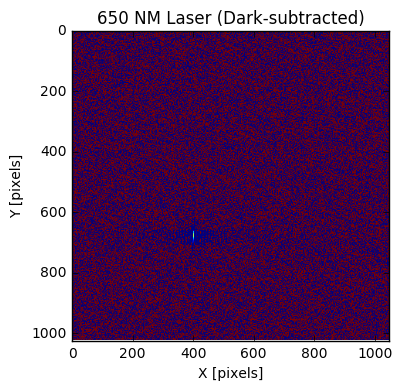

In [2]:
sumdark1 = np.zeros((1336, 2004))
for i in np.arange(16, 23):
	dark1 = pf.getdata("./10-11-2017/00" + str(i) + ".fts")
	sumdark1 = sumdark1 + dark1
avgdark1 = sumdark1/8


laser_file = 'Scans/650nmlaser.fit'
laser_header = pf.getheader(laser_file) #Get the header from the fits file
laser_data = pf.getdata(laser_file) #Get the CCD data from the fits file



#for key in laser_header:
    #print(key + ": ", laser_header[key])

plt.figure()

plt.imshow(laser_data - dark_data)

plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.title('650 NM Laser (Dark-subtracted)')

plt.show()
########################################################################

halogen_file = 'Scans/halogen.fit'
halogen_header = pf.getheader(halogen_file) #Get the header from the fits file
halogen_data = pf.getdata(halogen_file) #Get the CCD data from the fits file



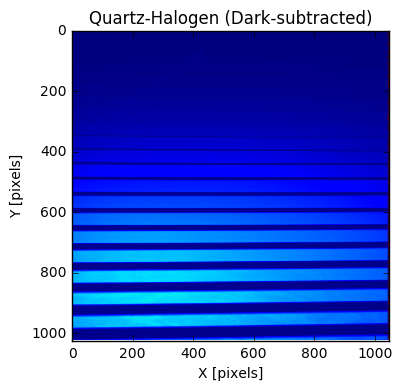

In [3]:
halogen_file = 'Scans/halogen.fit'
halogen_header = pf.getheader(halogen_file) #Get the header from the fits file
halogen_data = pf.getdata(halogen_file) #Get the CCD data from the fits file



#for key in halogen_header:
    #print(key + ": ", halogen_header[key])

plt.figure()

plt.imshow(halogen_data - dark_data)

plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.title('Quartz-Halogen (Dark-subtracted)')

plt.show()
########################################################################
########################################################################
########################################################################


In [60]:
 #order of diffraction
lamda =  632.8e-9
f = 100e-3 #slit width
sigma = 1/80e3 #Groove density
alpha = 75.4*(np.pi/180)
df = 50e-6
delta = 64.4*(np.pi/180)
theta = 11*(np.pi/180)
m = 2*(sigma/lamda)*np.sin(delta)*np.cos(theta)

#R = sigma*m*lamda*f/(np.cos(alpha)*df)
R = 2*np.sin(delta)*np.cos(theta)*f/(np.cos(alpha)*df)
print('Spectral Resolving Power R =', R)

delta_lambda = 300000/R
print('delta_lambda = ', delta_lambda)

#wave = (609.616 + 614.316 + 626.649 + 633.443 + 640.225 + 650.654)/6
wave = 632.187484
print(wave)
dlam = pn[1]
m = 0.00225
c = 3e8
t = 54/38
v = (dlam * m * c )/wave * (59-21)

print('Rotational Velocity = ', v, 'M/s')

r = (1/(2*np.pi))* v * 2.28e6
print('Suns radius = ' , r/1000, 'KM')
print(pn[1])

Spectral Resolving Power R = 14047.932347
delta_lambda =  21.3554559198
632.187484
Rotational Velocity =  1906.91389653 M/s
Suns radius =  691968.08172 KM
0.0469991071522


In [62]:
theta = 0.25 * (np.pi/180)
au = r/np.tan(theta)
print('Disntace from Earth to the Sun =', au/1.5e11, "AU")
x = 516
y = 0.042999*x + 610
print(y)

Disntace from Earth to the Sun = 1.05724264089 AU
632.187484
